<a href="https://colab.research.google.com/github/DataBaeDev/Financial-Well-Being-Analysis/blob/main/Financial_Well_Being_Analysis_Pt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Well-Being Analysis

The Consumer Financial Protection Bureau's (CFPB) financial well-being survey measures individuals' financial well-being using a standardized scale based on their responses to survey questions about their financial situation and behaviors. The survey provides a score from 0 to 100, with higher scores indicating greater financial well-being. According to the CFPB, the survey dataset includes measures of individual and household characteristics that research suggests may influence adults’ financial well-being. The objective of the survey is to help policymakers, researchers, and educators understand financial challenges and design programs to improve financial literacy and stability.<br><br>

Additional information on the survey can be found here: https://www.consumerfinance.gov/data-research/financial-well-being-survey-data/ <br><br>

**The purpose of this analysis is to answer the following questions:**<br>

1) Can the factors from one's childhood/adolescence included in the survey be used alone to predict the survey participants' current financial well-being score?<br>
2) Can one's interconnectedness be used to predict one's financial well-being score?<br>

The data used for this analysis was obtained from [consumerfinance.gov](https://consumerfinance.gov) in May 2024.<br>

**The following limitations should be considered when reviewing this analysis:**

*   Personal finance survey responses are highly subjective, as individuals' responses are influenced by personal perceptions, cultural norms, and social attitudes toward money. Feelings of embarrassment or shame about financial struggles may lead to misrepresentation ultimately affecting the accuracy of the data.
*   Respondents to this survey use a multiple-choice answer system, as a result they might be required to choose options that don't perfectly capture their unique situations. This limitation can lead to oversimplified data, as nuanced experiences and feelings about financial well-being may not fit neatly into predefined categories.



## Install and Import Libraries

In [1]:
# data viz library
!pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 15.0 MB/s eta 0:00:00


In [2]:
from IPython.display import HTML
import requests
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle

import seaborn as sns
import plotly.express as px

# Import Data

In [3]:
#Import the dataset

survey_results_df = pd.read_csv("https://raw.githubusercontent.com/DataBaeDev/Financial-Well-Being-Analysis/main/NFWBS_PUF_2016_data.csv")
#survey_results_df.head()

In [4]:
# Retrieve the contents of the mapping file from GitHub
response = requests.get("https://raw.githubusercontent.com/DataBaeDev/Financial-Well-Being-Analysis/main/PUF_field_map.py")
response.raise_for_status()  # if an error occurs, returns HTTPError object

# Read & execute the file, store the resulting builtins and field map in a dictionary
field_mapping_response = response.text

file_exec = {}
exec(field_mapping_response, file_exec)

In [5]:
#Assign the actual field map to it's own variable
field_map_dict = file_exec['field_map']

# Implement Notebook Settings

In [6]:
sns.set_palette("Set2")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Dataset Overview
*  6394 rows x 217 columns
*  Each record represents a survey response

In [7]:
print("Number of Records", survey_results_df.shape[0])
print("Number of Columns", survey_results_df.shape[1])

#survey_results_df.columns.values

Number of Records 6394
Number of Columns 217


In [8]:
survey_results_missing = survey_results_df.isna().sum()
total_missing_values = survey_results_missing.sum()
print("Number of NULL values in the dataset:", total_missing_values)

Number of NULL values in the dataset: 0


Surveys with null or empty values were excluded from the original dataset. However, participants had the option to refuse to answer questions.<br><br>
Outliers are generally not a concern, since respondents answered using a multiple choice answer system.

# Survey Participant Demographics (Initial Exploratory Data Analysis)

Response Breakdown by Age Category and Gender

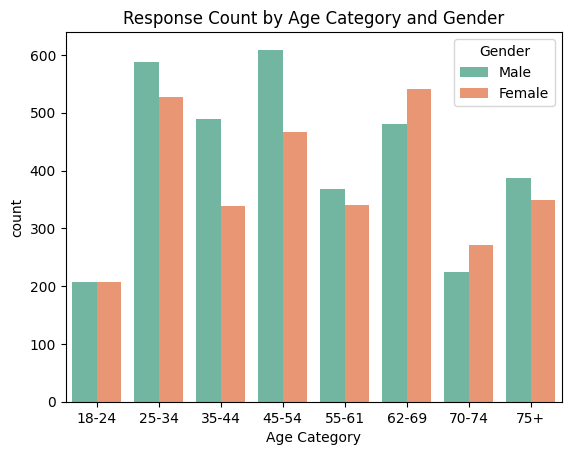

In [9]:
age_gender_df = survey_results_df[["agecat", "PPGENDER"]].value_counts().reset_index()
age_gender_df['Age Category'] = age_gender_df.agecat.map(field_map_dict['agecat'])
age_gender_df['Gender'] = age_gender_df['PPGENDER'].map(field_map_dict['PPGENDER'])
age_gender_df.sort_values(by="agecat", inplace=True)

age_gender_plot = sns.barplot(data = age_gender_df, x="Age Category", y="count", hue="Gender")
age_gender_plot.set_title("Response Count by Age Category and Gender");

Response Breakdown by Geographical Region & Household Income

In [10]:
income_geo_df = survey_results_df[["PPREG4", "PPINCIMP"]].value_counts().reset_index()
income_geo_df['Census Region'] = income_geo_df["PPREG4"].map(field_map_dict['PPREG4'])
income_geo_df['Household Income'] = income_geo_df["PPINCIMP"].map(field_map_dict['PPINCIMP'])
income_geo_df.sort_values(by=["PPINCIMP", "PPREG4"], inplace=True)
#print(income_geo_df.head())

income_geo_tree = px.treemap(income_geo_df, path=["Census Region", "Household Income"], values="count", title="Responses by Geography and Household Income" )
income_geo_tree.update_traces(marker=dict(cornerradius=3))
income_geo_tree.update_layout(
    uniformtext_minsize=9,
    margin = dict(t=50, l=25, r=25, b=25)
)
income_geo_tree.data[0].textinfo = 'label+value'
income_geo_tree.show()

Response Breakdown by Survey Participants' Education Level

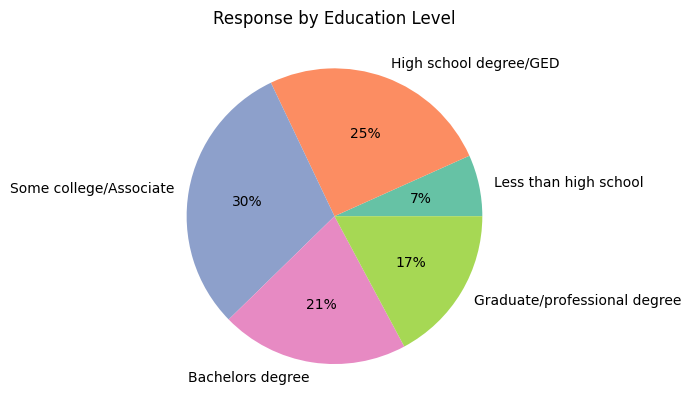

In [11]:
ed_level = survey_results_df["PPEDUC"].value_counts().to_frame()
ed_level['Education Level'] = ed_level.index.map(field_map_dict['PPEDUC'])
ed_level = ed_level.sort_index()
#print(ed_level)

plt.pie(ed_level['count'], labels=ed_level['Education Level'], autopct='%.0f%%')
plt.title("Response by Education Level")
plt.show()

Response Breakdown by Retirement Status

In [12]:
#Isolate the retirement status data
retirement_status = survey_results_df["EMPLOY1_8"].value_counts().to_frame()
retirement_status['Is Retired?'] = retirement_status.index.map(field_map_dict['EMPLOY1_8'])
retirement_status = retirement_status.sort_index()

#print(retirement_status)

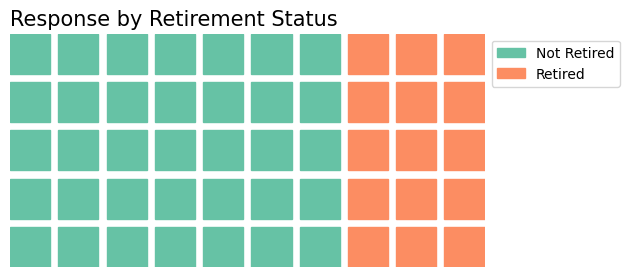

In [13]:
plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=retirement_status['count'],
    title={
      'label': 'Response by Retirement Status',
      'loc': 'left',
      'fontdict': {
          'fontsize': 15
      }
    },
    labels= ['Not Retired', 'Retired'],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
);

## Analysis:
### **Question 1:** Can the factors from one's childhood/adolescence included in the survey be used alone to predict the survey participants' current financial well-being score?

This portion of the analysis includes the following survey questions:
*   Highest level of education by person/people who raised respondent
*   Discussed family financial matters with me (yes/no)
*   Spoke to me about the importance of saving (yes/no)
*   Discussed how to establish a good credit rating (yes/no)
*   Taught me how to be a smart shopper (yes/no)
*   Taught me that my actions determine my success in life (yes/no)
*   Provided me with a regular allowance (yes/no)
*   Provided me with a savings account (yes/no)

In [14]:
#Determine which features should be used to answer this question
finsoc_columns = ['PAREDUC', 'FINSOC2_1','FINSOC2_2', 'FINSOC2_3', 'FINSOC2_4', 'FINSOC2_5',
                  'FINSOC2_6','FINSOC2_7','FWBscore']
finsoc_df = survey_results_df[finsoc_columns]
finsoc_df.sample(5)

,PAREDUC,FINSOC2_1,FINSOC2_2,FINSOC2_3,FINSOC2_4,FINSOC2_5,FINSOC2_6,FINSOC2_7,FWBscore
5026,2,0,1,1,1,1,1,1,37
5966,2,0,0,0,0,0,0,0,49
6328,1,1,1,1,1,1,0,1,14
4368,2,1,0,0,0,0,0,0,60
2944,2,0,1,0,0,0,0,0,52


# Data Manipulation

In [15]:
# Dropping the records that don't have a financial well-being score {-4: 'Response not written to database', -1: 'Refused'}
finsoc_df = finsoc_df[finsoc_df['FWBscore']>0]

#Dropping the records that did not provide the parents' highest level of education {-1: 'Refused'}
finsoc_df = finsoc_df[finsoc_df['PAREDUC']>0]

In [16]:
#For the yes/no questions, changed "refused" to "no"
for col in finsoc_df.columns[1:-1]:
  finsoc_df[col].replace(-1,0, inplace=True)
  #  print(finsoc_df[col].value_counts())

# Exploratory Data Analysis

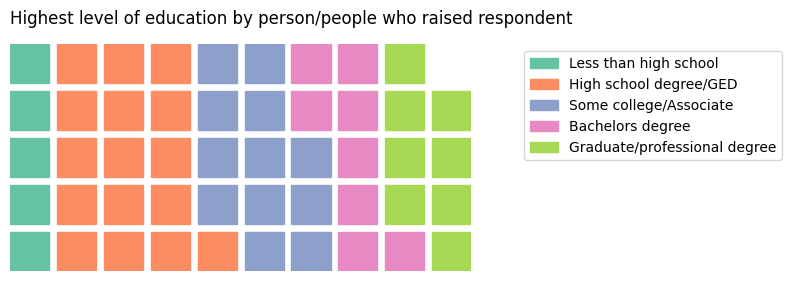

In [39]:
#Visualize the respondents parent's education using proportions
finsoc_df['Parent Education Values'] =  finsoc_df['PAREDUC'].map(field_map_dict['PAREDUC'])

parent_educ = finsoc_df[['Parent Education Values', 'PAREDUC']].value_counts().reset_index().sort_values(by=['PAREDUC'])
#print(parent_educ)

plt.figure(
    figsize=(8,7),
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values= parent_educ['count'],
     plot_anchor='S',
    title={
      'label': 'Highest level of education by person/people who raised respondent',
      'pad':15,
      'loc': 'left',
      'fontdict': {
          'fontsize': 12
      }
    },
     labels= parent_educ['Parent Education Values'].to_list(),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1,1)}
);

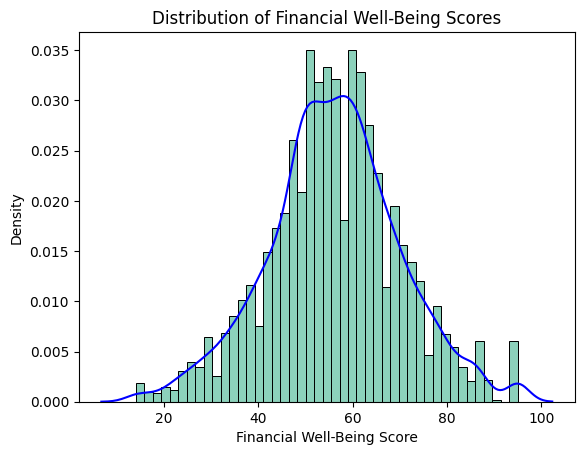

In [18]:
ax = sns.histplot(data=finsoc_df, x='FWBscore', stat='density')
sns.kdeplot(data=finsoc_df, x='FWBscore', color="blue", ax=ax)
ax.set(title='Distribution of Financial Well-Being Scores')
plt.xlabel('Financial Well-Being Score');

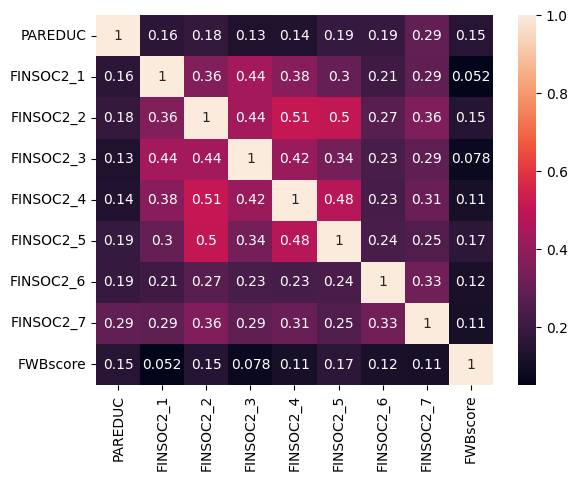

In [19]:
sns.heatmap(finsoc_df.corr(numeric_only=True), annot=True);

## Import Machine Learning Models

In [20]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

## Split the Data into Training and Test Datasets

In [21]:
# Establish independent and dependent variables
X = finsoc_df.drop(columns=["FWBscore", "Parent Education Values"], axis=1).values #remove dependent variable and non-numeric column
##XX = np.array(independent_variables).reshape(-1, 1)

y = finsoc_df['FWBscore'].values

In [22]:
#split the data using the default settings
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2 )

In [23]:
model_dict = {
    "Linear_Regression" : LinearRegression(),
    "Random_Forest_Regressor" : RandomForestRegressor(),
    "Gradient_Boost_Regressor": GradientBoostingRegressor(),
    "KNN_Regressor": KNeighborsRegressor()
  }

## Train Models and Display Accuracy

In [24]:
for model in model_dict:
  model_dict[model].fit(x_train, y_train)

  # Predict the test set
  y_pred = model_dict[model].predict(x_test)

# Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  #Display results as html for ease of reading
  html_output = f"""
    <div>
        <strong style='background-color: #DDBFFE;'>{model}</strong><br>
        Mean Squared Error: {mse}<br>
        R-squared: {r2}
    </div>
    """
  display(HTML(html_output))
  #pickle.dump(model_dict[model], open(f'/content/drive/MyDrive/Financial Well Being Analysis/Q1_{model}_.pkl','wb'))

## Compare predictions for each model with actual values

In [25]:
# Generate an array of 5 random records
random_numbers = np.random.randint(0, 1269, size=5)

# For each selected record, print the record index and actual value
for num in random_numbers:
  actual_value = y_test[num]
  record_detail =f"""
    <div style='background-color: #DDBFFE;'>
        <p><strong>Record Index:</strong> {num} &emsp; <strong>Actual value:</strong> {actual_value}</p>
    </div>
    """
  display(HTML(record_detail))
  #for each model, display the predicted value
  for model in model_dict:
    prediction = model_dict[model].predict(x_test[num].reshape(1, -1))
    results =  f"""
    <p>{model} Prediction: {prediction}</p>
    """
    display(HTML(results))

## Findings:
### **Question 1:** Can the factors from one's childhood/adolescence included in the survey be used alone to predict the survey participants' current financial well-being score?
Overall, each of the models were unable to use the survey's questions related to childhood and adolescence to predict the final Financial Well-Being Score (FWBS). In most cases they underpredicted the FWBS.<br>

The correlation matrix did not show a strong linear relationship between any of the childhood factors and the FWBS.<br>

Each of of the models had a high mean squared error score, indicating a large difference between the predicted FWBS and the actual FWBS. Furthermore the maximum r-squared score was .048 for this group of features and models. At best, 4.8% of the variability in the FWBS can be explained by this group of questions.



###**Recommendations**
The takeaway from this portion of the analysis is that the childhood experiences outlined in this survey cannot be independently used to predict one's financial well-being score.

One way to improve these questions might be to change the response from "yes/no" to an ordinal scale (1-5 ranging from never to very often) where possible. For example, an ordinal  scale response to whether one's parents spoke about the importance of saving would help distinguish between respondents who had frequent, recurring conversations about savings from respondents who only had such conversations once or twice.

## Analysis
### **Question 2:** Can the factors from one's social interconnectedness included in the survey be used alone to predict the survey participants' current financial well-being score?
This portion of the analysis includes  responses to the question “Do you seek advice on matters involving money from any of the following types of
people or organizations?”<br>

*  Parent
*  Spouse/Partner
*  Extended family (e.g., uncle, aunt, cousins,grandparents)
*  Employer
*  Friends/Co-workers
*  Community or faith-based organizations
*  Financial institution
*  Professional advisor, planner or counselor/coach
*  Government

In [26]:
#create a dataframe consisting of only the "interconnectedness" columns

interconn_cols = ['INTERCONNECTIONS_1', 'INTERCONNECTIONS_2',
       'INTERCONNECTIONS_3', 'INTERCONNECTIONS_4', 'INTERCONNECTIONS_5',
       'INTERCONNECTIONS_6', 'INTERCONNECTIONS_7', 'INTERCONNECTIONS_8',
       'INTERCONNECTIONS_9','FWBscore']

interconn_df = survey_results_df[interconn_cols]
interconn_df.sample(5)

,INTERCONNECTIONS_1,INTERCONNECTIONS_2,INTERCONNECTIONS_3,INTERCONNECTIONS_4,INTERCONNECTIONS_5,INTERCONNECTIONS_6,INTERCONNECTIONS_7,INTERCONNECTIONS_8,INTERCONNECTIONS_9,FWBscore
6020,0,0,0,0,0,0,0,0,0,57
3398,0,1,0,0,0,0,0,1,0,60
4007,0,1,0,0,0,0,0,0,0,64
5942,0,1,0,0,0,0,0,0,0,49
4220,0,0,0,0,0,0,0,0,0,30


In [27]:
# Dropping the records that don't have a financial well-being score {-4: 'Response not written to database', -1: 'Refused'}
interconn_df = interconn_df[interconn_df['FWBscore']>0]

# Exploratory Data Analysis

In [28]:
interconn_question_map = {
    'INTERCONNECTIONS_1': 'Parent',
    'INTERCONNECTIONS_2': 'Spouse/Partner',
    'INTERCONNECTIONS_3': 'Extended Family',
    'INTERCONNECTIONS_4': 'Employer',
    'INTERCONNECTIONS_5': 'Friends/Coworkers',
    'INTERCONNECTIONS_6': 'Community or Faith-Based Organizations',
    'INTERCONNECTIONS_7': 'Financial Institution',
    'INTERCONNECTIONS_8': 'Professional Advisor or Planner',
    'INTERCONNECTIONS_9': 'Government'
}

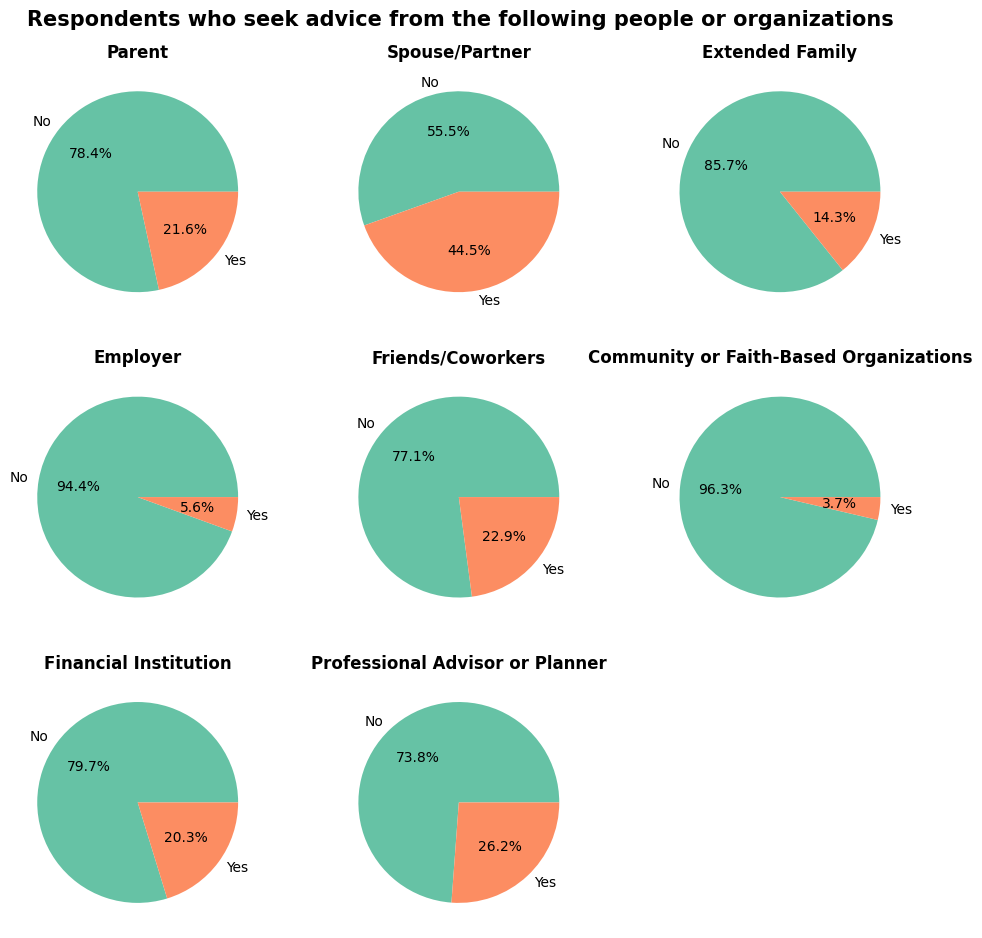

In [29]:
#Visualize the breakdown of to whom and where respondents go for financial advice

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(interconn_cols[:8]):
  data = interconn_df[col].value_counts().transpose()
  data.index= ['No','Yes']
  data.plot.pie( autopct='%1.1f%%', ax=axes[i])
  axes[i].set_title(interconn_question_map[f'{col}'], fontweight='bold')
  axes[i].set_ylabel('')  # Remove the default y-label

# Hide the unused subplot
axes[8].set_visible(False)

plt.suptitle('Respondents who seek advice from the following people or organizations', fontsize=15, fontweight='bold', y=0.95)

plt.tight_layout(pad=2.3)
plt.show();

# Split the Data into Training and Test Datasets

In [30]:
# Establish independent and dependent variables

X = interconn_df.drop(columns=["FWBscore"], axis=1).values #remove dependent variable and non-numeric column
y = interconn_df['FWBscore'].values

In [31]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2 )

# Train Models and Display Accuracy

In [33]:
for model in model_dict:
  model_dict[model].fit(x_train, y_train)

  # Predict the test set
  y_pred = model_dict[model].predict(x_test)

# Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  #Display results as html for ease of reading
  html_output = f"""
    <div>
        <strong style='background-color: #DDBFFE;'>{model}</strong><br>
        Mean Squared Error: {mse}<br>
        R-squared: {r2}
    </div>
    """
  display(HTML(html_output))
  #pickle.dump(model_dict[model], open(f'/content/drive/MyDrive/Financial Well Being Analysis/Q2_{model}_.pkl','wb'))

# Compare predictions for each model with actual values

In [34]:
# Generate an array of 5 random records
random_numbers = np.random.randint(0, 1278, size=5)

# For each selected record, print the record index and actual value
for num in random_numbers:
  actual_value = y_test[num]
  record_detail =f"""
    <div style='background-color: #f9ab00;'>
        <p><strong>Record Index:</strong> {num} &emsp; <strong>Actual value:</strong> {actual_value}</p>
    </div>
    """
  display(HTML(record_detail))
  #for each model, display the predicted value
  for model in model_dict:
    prediction = model_dict[model].predict(x_test[num].reshape(1, -1))
    results =  f"""
    <p>{model} Prediction: {prediction}</p>
    """
    display(HTML(results))

## Findings:
### **Question 2:** Can the factors from one's social interconnectedness included in the survey be used alone to predict the survey participants' current financial well-being score??
Each of of the models had a high mean squared error score, indicating a large difference between the predicted FWBS and the actual FWBS. Furthermore the maximum r-squared score was .10 for this group of features and models. At best, 10% of the variability in the FWBS can be explained by this group of questions.

In conclusion, the models were unable to use the survey's "interconnectedness" questions to predict the final Financial Well-Being Score (FWBS). In many cases they underpredicted the FWBS by approximately 15 points.<br>


###**Recommendations**

Similar to the childhood/adolescence questions, these questions would be more indicative of the FWBS if the questions were modified to accommodate responses on an ordinal scale (1-5 ranging from never to very often). Also, the questions should focus on whether respondents received advice that resulted in a positive outcome.

Another question to consider would be whether respondents obtain financial advice from social media. And if so, has the outcome been positive?